<a href="https://colab.research.google.com/github/amthreeh/healthnutrition/blob/main/healthnutrition_%EC%9E%84%EC%A7%80%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [4]:
%cd /content/drive/MyDrive/nationalhealth-main

/content/drive/MyDrive/nationalhealth-main


In [5]:
df = pd.read_csv('/content/drive/MyDrive/nationalhealth-main/nationalhealth_2010to2021.csv')
df.head()

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,b'A310439801',b'A3104398',2010.0,1.0,1.0,2.0,63.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35629 entries, 0 to 35628
Columns: 122 entries, ID to 우울증
dtypes: float64(120), object(2)
memory usage: 33.2+ MB


ID            0
ID_fam        0
year          0
region        0
town_t        0
             ..
협심증또는심근경색증    0
천식            0
아토피피부염        0
골관절염          0
우울증           0
Length: 122, dtype: int64

In [9]:
df.columns

Index(['ID', 'ID_fam', 'year', 'region', 'town_t', 'sex', 'age', 'incm',
       'ho_incm', 'incm5',
       ...
       '고콜레스테롤혈증', '고중성지방혈증', 'B형간염', '빈혈', '뇌졸중', '협심증또는심근경색증', '천식',
       '아토피피부염', '골관절염', '우울증'],
      dtype='object', length=122)

##'연도 변화에 따른 신체/질병 특성의 변화'

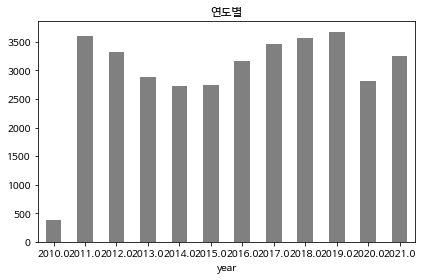

In [7]:
s = df.groupby('year').size()

s.plot(color='grey', kind='bar', rot=0)
plt.title("연도별")
plt.tight_layout()

가장 많은 연도: 2019, 2011    
가장 적은 연도: 2014, 2015

In [29]:
df.groupby('year').size()

year
2010.0     389
2011.0    3611
2012.0    3331
2013.0    2880
2014.0    2722
2015.0    2746
2016.0    3168
2017.0    3465
2018.0    3565
2019.0    3676
2020.0    2815
2021.0    3261
dtype: int64

2010년 데이터 제외

In [17]:
df.groupby('region').size()

region
1.0     6714
2.0     2182
3.0     1784
4.0     1985
5.0     1124
6.0     1151
7.0      772
8.0     3888
9.0     5181
10.0    1281
11.0    1308
12.0    1379
13.0    1209
14.0    1707
15.0    1959
16.0    1615
17.0     390
dtype: int64

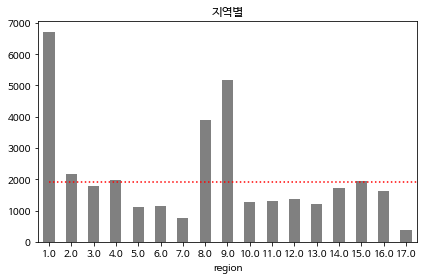

In [18]:
region = df.groupby('region').size()

region.plot(color='grey', kind='bar', rot=0)
plt.hlines(y=1900, xmin = 0, xmax = 17.5, color='red', linestyle='dotted')
plt.title("지역별")
plt.tight_layout()

환자 수가 많은 지역: 서울>경기>세종>부산>인천

In [24]:
print("나이 평균",df['age'].mean())
print("최소값",df['age'].min())
print("최대값",df['age'].max())

나이 평균 55.918353027028544
최소값 30.0
최대값 80.0


#나이에 따른 신체/질병 관련 특성'

In [41]:
thirty = df.loc[30<=df['age']<40, "age"]
# fourty = df[40<=df['age']<50]
# fifty = df50<=df['age']<60
# sixty = 60<=df['age']<70
# seventy = 70<=df['age']<=80

ValueError: ignored

In [ ]:
df.groupby('region').size()

region.plot(color='grey', kind='bar', rot=0)
plt.hlines(y=1900, xmin = 0, xmax = 17.5, color='red', linestyle='dotted')
plt.title("지역별")
plt.tight_layout()

#성별에 따른 신체/질병 관련 특성

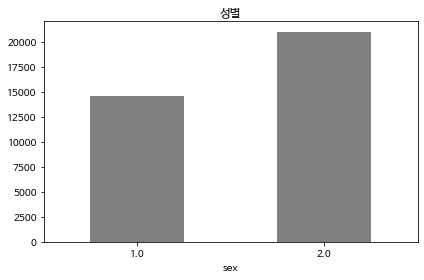

In [31]:
sex = df.groupby('sex').size()

sex.plot(color='grey', kind='bar', rot=0)
#plt.hlines(y=1900, xmin = 0, xmax = 17.5, color='red', linestyle='dotted')
plt.title("성별")
plt.tight_layout()

In [48]:
men = df[df['sex']==1]['sex']
men

0        1.0
3        1.0
5        1.0
7        1.0
9        1.0
        ... 
35618    1.0
35621    1.0
35624    1.0
35625    1.0
35627    1.0
Name: sex, Length: 14620, dtype: float64

In [57]:
men = df[df['sex']==1]['year']
men.value_counts()

2019.0    1527
2011.0    1465
2018.0    1458
2017.0    1451
2021.0    1352
2012.0    1337
2016.0    1258
2020.0    1171
2013.0    1166
2015.0    1131
2014.0    1098
2010.0     206
Name: year, dtype: int64

In [56]:
women = df[df['sex']==2]['year']
women.value_counts()

2019.0    2149
2011.0    2146
2018.0    2107
2017.0    2014
2012.0    1994
2016.0    1910
2021.0    1909
2013.0    1714
2020.0    1644
2014.0    1624
2015.0    1615
2010.0     183
Name: year, dtype: int64

남성과 여성의 차이:
2021년에는 남성들의 발병률이 여성보다 높았음

In [66]:
men.value_counts().index

Float64Index([2019.0, 2011.0, 2018.0, 2017.0, 2021.0, 2012.0, 2016.0, 2020.0,
              2013.0, 2015.0, 2014.0, 2010.0],
             dtype='float64')

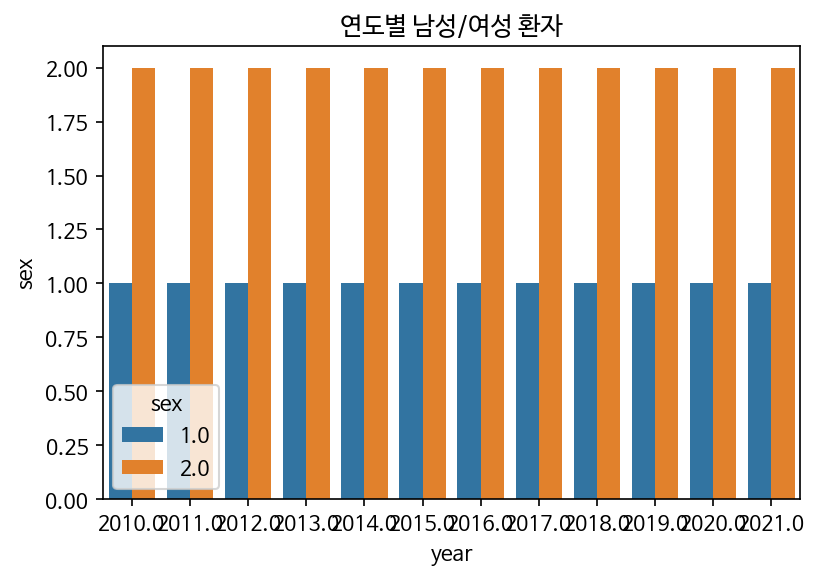

In [72]:
plt.figure(dpi=150)
plt.title("연도별 남성/여성 환자")
plt.xlabel('year')
plt.ylabel('남성')
sns.barplot(x=df['year'], y=df['sex'], hue=df['sex'])

#plt.hlines(y=50, xmin=0, xmax=1230, color='red', linestyle='dotted')
plt.show()

# men.value_counts().plot(color='black', kind='bar', rot=0)
# women.value_counts().plot(color='pink', kind='bar', rot=0)
#plt.hlines(y=1900, xmin = 0, xmax = 17.5, color='red', linestyle='dotted')

#plt.tight_layout()

In [ ]:
x = ['sex']
y = [df[df['sex'] == 1.0]['year'].mean(), df[df['sex'] == 2]['year'].mean()]

plt.figure(dpi=150)
plt.title("중식계 vs 휴가자수")
plt.xlabel('year')
plt.ylabel('sex')
plt.bar(x, y)
plt.show()

In [7]:
features = ['고콜레스테롤혈증', '고중성지방혈증', 'B형간염', '빈혈', '뇌졸중', '협심증또는심근경색증', '천식',
       '아토피피부염', '골관절염', '우울증']
X = train[features]
y = train['year']

In [ ]:
from sklearn.tree import DecisionTreeRegressor

year_model = DecisionTreeRegressor()
year_model.fit(X,y)